## Credit Card Defaults - task description

1.    **Credit limit**: test whether there are differences between median credit limits of two groups.

2.    **Gender**: test whether gender composition of two groups differ.

3.    **Education**: test whether education levels differs between two groups. If it does, then how exactly?

4.    **Marital status**: Check how marital status is related to the default indicator: you need to propose a measure by which you can measure the possible relationship of these variables and calculate its value.

5.    **Age**: test whether there are differences between mean ages of clients in two groups.

·    Upload a jupyter notebook with the results of your analysis

·      Start addressing each question by plotting the corresponding feature across two groups in a way that makes it easy to compare them

·      For every comparison, provide calculations of test p-value and appropriate effect size estimates

·      For every question, describe what hypothesis you are testing, what is the alternative. Describe the test you are using, what assumptions does it use and why do they hold. Say whether the hypotheses is accepted or rejected at 0.05. If the question allows, estimate effect size and state whether you thing it is practically significant.


In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import math
from scipy import stats
from mlxtend.evaluate import permutation_test
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 1. Credit limit: test whether there are differences between median credit limits of two groups.

In [4]:
data.LIMIT_BAL.value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [5]:
data.shape

(30000, 25)

Taking in account the frequency analysis for this variable we can expect the problem for CLT (only 81 possible values for 30000 rows).Lets split the data by the default status

In [6]:
default_n = data[data.default == 0] # who did have default
default_y  = data[data.default == 1] # who did default

Lets generate a histograme to see the distributions

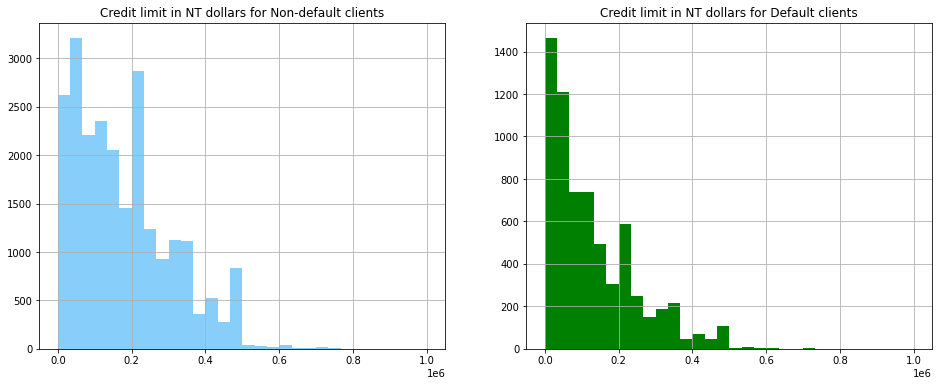

In [7]:
pylab.figure(figsize(16, 6))

pylab.subplot(121)
default_n.LIMIT_BAL.hist(color='lightskyblue', bins = 30, range = (0, 1000000))
plt.title('Credit limit in NT dollars for Non-default clients')

pylab.subplot(122)
default_y.LIMIT_BAL.hist(color='green', bins = 30, range = (0, 1000000))
plt.title('Credit limit in NT dollars for Default clients')


plt.show()


**The hypothesis**:

- **Null Hypothesis**: the medians values of the credit limit for people who defaulted and who did not defaulted the credit are equal. 
- **Alternative Hypothesis**: medians are different.

**Maths form**:
- $H_0:median_0=median_1$

- $H_1:median_0≠median_1$

In [8]:
print(f'median credit value for clients who did not default = {default_n.LIMIT_BAL.median()}')
print(f'median credit value for clients who defaulted = {default_y.LIMIT_BAL.median()}')    
med_dif = abs(np.median(default_n.LIMIT_BAL) - np.median(default_y.LIMIT_BAL))
print(f'Difference in medians = {med_dif}')

def get_bootstrap_samples(x, n_resamples):
    indices = np.random.randint(0, len(x), (n_resamples, len(x)))
    resamples = x[indices]
    return resamples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

np.random.seed(0)

limit_0_ = list(map(np.median, get_bootstrap_samples(np.array(default_n.LIMIT_BAL), 1000)))
limit_1_ = list(map(np.median, get_bootstrap_samples(np.array(default_y.LIMIT_BAL), 1000)))

med_dif_conf_inf = list(map(lambda x, y: abs(x - y), limit_0_, limit_1_))

print(f'95 percent  Conf. int. for median difference {stat_intervals(med_dif_conf_inf, 0.05)[0], stat_intervals(med_dif_conf_inf, 0.05)[1]}')

median credit value for clients who did not default = 150000.0
median credit value for clients who defaulted = 90000.0
Difference in medians = 60000.0
95 percent  Conf. int. for median difference (60000.0, 70000.0)


Let's test whether there are differences between median credit limits of two group. As option we can 
build 95% interval for the medians difference using bootstrap method (no needs for any assumption regarding a population)

As result we can see no overlapping of 95%CI. Acording to to obtained data we can conclude that we have an important effect size, confidence inteval for median difference [60000, 70000], medians being 150000 and 90000
Another option is permutation test

In [9]:

p_value = permutation_test(default_n.LIMIT_BAL, default_y.LIMIT_BAL, paired=False, 
                           method='approximate', seed=0, num_rounds=10000)

print(f'P value = {p_value}')


P value = 9.999000099990002e-05


Conclusion: Finally we can reject null hypotesis ($H_0:median_0=median_1$) versus two-side alternative ($H_1:median_0≠median_1$) at level 0.05, permutation test p = 9.999000099990002e-05. Moreover, the practical significance was determined median difference 60000 (CI 95% 60000, 70000)    


## 2. Gender: test whether gender composition of two groups differ.

In [10]:
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt

from statsmodels.stats.proportion import proportion_confint, proportions_ztest, \
confint_proportions_2indep, test_proportions_2indep

In [11]:
data_mens = data[data['GENDER'] == 1]
data_womans = data[data['GENDER'] == 2]


Mens_n = len(data_mens[data_mens['default'] == 0])
Mens_d = len(data_mens[data_mens['default'] == 1])
Womens_n = len(data_womans[data_womans['default'] == 0])
Womens_d = len(data_womans[data_womans['default'] == 1])

print(Mens_n, Mens_d, Womens_n, Womens_d)


9015 2873 14349 3763


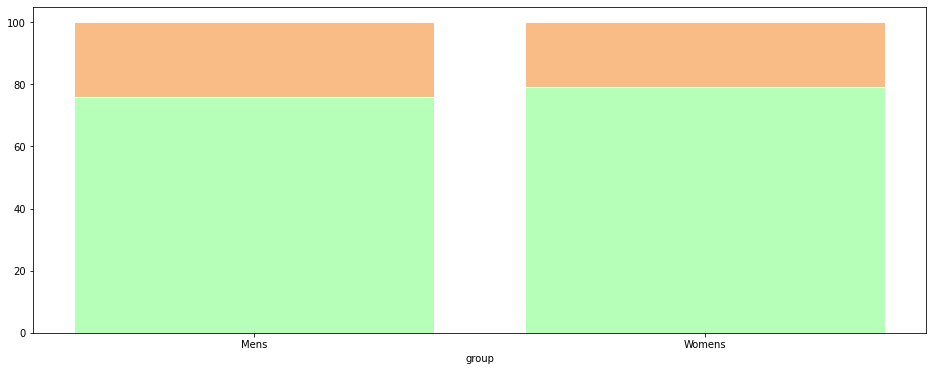

In [12]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1]
raw_data = {'greenBars': [Mens_n, Womens_n], 'orangeBars': [Mens_d, Womens_d]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
barWidth = 0.80
names = ('Mens','Womens')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

To test whether gender composition of two groups differ let's use Chi-squared test for independence. According to the null hypothesis variables **GENDER** and **default** are independent, the alternative hypothesis states that null hypothesis is false (significance level a = 0.05)

**Null hypothesis**: GENDER and default are independent                     

**Alternative hypothesis**: Null hypothesis is false
                           

In [13]:
ct = pd.crosstab(data.default, data.GENDER)
ct

GENDER,1,2
default,,
0,9015,14349
1,2873,3763


In [14]:
stats.chi2_contingency(ct, correction=True) # Yates’ correction for continuity because of 2 by 2 table

(47.70879689062111,
 4.944678999412044e-12,
 1,
 array([[ 9258.3744, 14105.6256],
        [ 2629.6256,  4006.3744]]))

In [15]:

### In 2-b-2 tables, phi can be interpreted as symmetric percent difference, 
### measuring the percent of concentration of cases on the diagonal. 
### Also in 2-by-2 tables, phi is identical to the correlation coefficient.

Phi = 47.70879689062111/math.sqrt(30000) # effect size estimation
Phi 

0.2754468672751328

$p=4.9\times10^{-12}<0.05$ – null hypothesis is rejected. None of the expected counts (the array returned above) are below 5, so chi-squared test is accurate. In the same time the effect size was estimated at the small level (small 0.1 - 0.29, medium 0.3 - 0.49, Large more than 0.5). 
Thus, rejecting null hypothesis we have no practical significant effect. The association is not strong enought, gender composition in both group does not differ.


## 3. Education: test whether education levels differs between two groups. If it does, then how exactly?

EDUCATION: 0 = doctorate, 1 = masters; 2 = bachelor; 3 = school graduate; 4 = elementary education; 5 = other; 6 = no data.

In [16]:
import statsmodels.api as sm

data_ct = data[["EDUCATION", "default"]]

tbl = sm.stats.Table.from_data(data_ct)

print(tbl.table_orig)



default        0     1
EDUCATION             
0             14     0
1           8549  2036
2          10700  3330
3           3680  1237
4            116     7
5            262    18
6             43     8


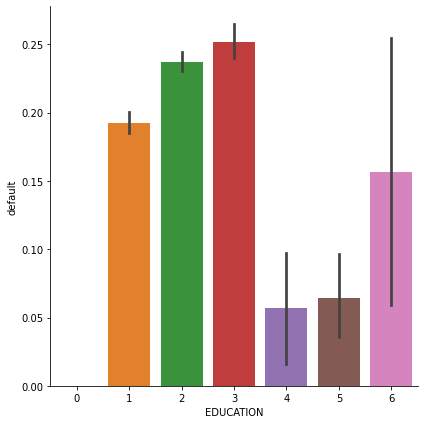

In [17]:
sns.catplot(x='EDUCATION', y='default',  data=data, kind="bar", height = 6)


Analysing the contingency table is optimal to fuse the category 0 and category 1 (masterate and doctorate are somethere close to each other) 
Also we can put in the same category 3 and 4. Last optimization being analysing categories 5 and 6 as one.

In [18]:
data_opt = data.copy()
data_opt.EDUCATION[data_opt.EDUCATION == 0] = 1
data_opt.EDUCATION[data_opt.EDUCATION == 4] = 3
data_opt.EDUCATION[data_opt.EDUCATION == 6] = 5

**Null hypothesis**: Education and default are independent                     

**Alternative hypothesis**: Null hypothesis is false

In [19]:
ct = pd.crosstab(data_opt.EDUCATION, data_opt.default)
ct

default,0,1
EDUCATION,,
1,8563,2036
2,10700,3330
3,3796,1244
5,305,26


In [20]:
stats.chi2_contingency(ct)

(131.67125551365388,
 2.3599198278262482e-28,
 3,
 array([[ 8254.5012,  2344.4988],
        [10926.564 ,  3103.436 ],
        [ 3925.152 ,  1114.848 ],
        [  257.7828,    73.2172]]))

In [21]:
# effect size determination

def v_cramer(chi, n, shape):
    return np.sqrt(chi/n/(min(shape[0], shape[1])-1))

n = len(data) 

print ('v_cramer: ', v_cramer(stats.chi2_contingency(ct, correction=False)[0], 
                             n, ct.shape))

v_cramer:  0.06624984415419502


$p=2.36\times10^{-28}<0.05$ – null hypothesis is rejected. None of the expected counts (the array returned above) are below 5, so chi-squared test is accurate. 
In the same time the effect size was estimated at the small level (Cramer's V = 0.07). 
Thus, rejecting null hypothesis we have no practical significant effect. The association is not strong enought, education level in both group does not differ.

## 4. Marital status: Check how marital status is related to the default indicator: you need to propose a measure by which you can measure the possible relationship of these variables and calculate its value.

MARITAL: marital status: 0 = no answer; 1 = married; 2 = single; 3 = no data.

In [22]:
data.groupby(['MARITAL'])['MARITAL'].count()

MARITAL
0       54
1    13659
2    15964
3      323
Name: MARITAL, dtype: int64

No answer and no data can be fused

In [23]:
data_opt = data.copy()
data_opt.loc[data_opt.MARITAL == 0, 'MARITAL'] = 3
data_opt.groupby(['MARITAL'])['MARITAL'].count()

MARITAL
1    13659
2    15964
3      377
Name: MARITAL, dtype: int64

$H_0$: marital status and default status are independent

$H_1$: $H_0$ is false

In [24]:
ct = pd.crosstab(data_opt.MARITAL, data_opt.default)
ct

default,0,1
MARITAL,,
1,10453,3206
2,12623,3341
3,288,89


In [25]:
stats.chi2_contingency(ct)

(28.13032464482199,
 7.790720364202813e-07,
 2,
 array([[10637.6292,  3021.3708],
        [12432.7632,  3531.2368],
        [  293.6076,    83.3924]]))

In [26]:
# effect size determination

def v_cramer(chi, n, shape):
    return np.sqrt(chi/n/(min(shape[0], shape[1])-1))

n = len(data) 

print ('v_cramer: ', v_cramer(stats.chi2_contingency(ct, correction=False)[0], 
                             n, ct.shape))


v_cramer:  0.030621520017150242


$p=7.79\times10^{-07}<0.05$ – null hypothesis is rejected. None of the expected counts (the array returned above) are below 5, so chi-squared test is accurate. 
In the same time the effect size was estimated at the small level (Cramer's V = 0.03). 
Thus, rejecting null hypothesis we have no practical significant effect. The association is not strong enought, marital status and default status are independent.

Another option is to remove no answer and no data categories. 
In this case multiple testing problem has to be considered

In [27]:
data_opt_2 = data.copy()
data_opt_2.drop(data_opt_2.loc[data_opt_2['MARITAL'] == 0].index, inplace=True)
data_opt_2.drop(data_opt_2.loc[data_opt_2['MARITAL'] == 3].index, inplace=True)
data_opt_2.groupby(['MARITAL'])['MARITAL'].count()


MARITAL
1    13659
2    15964
Name: MARITAL, dtype: int64

$H_0$: marital status and default status are independent

$H_1$: $H_0$ is false

In [28]:
ct = pd.crosstab(data_opt_2.MARITAL, data_opt_2.default)
ct

default,0,1
MARITAL,,
1,10453,3206
2,12623,3341


In [29]:
stats.chi2_contingency(ct, correction=True) # Yates’ correction for continuity because of 2 by 2 table

(27.5094090929579,
 1.5633210355976673e-07,
 1,
 array([[10640.21483307,  3018.78516693],
        [12435.78516693,  3528.21483307]]))

In [30]:
# effect size determination

Phi = 27.5094090929579/math.sqrt(30000) # effect size estimation
Phi 

0.15882564745066782

In [31]:
# multiple testing correction (Bonferroni)

p = 1.5633210355976673e-07*2
p

3.1266420711953346e-07

Also we need to change the p-value for the first test

$p=3.12\times10^{-07}<0.05$ – null hypothesis is rejected. None of the expected counts (the array returned above) are below 5, so chi-squared test is accurate. 
In the same time the effect size was estimated at the small level (Phi = 0.16). 
Thus, rejecting null hypothesis we have no practical significant effect. The association is not strong enought, marital status and default status are independent.

## 5. Age: test whether there are differences between mean ages of clients in two groups.

In [32]:
repayment = data[data.default == 0]
loan = data[data.default == 1]

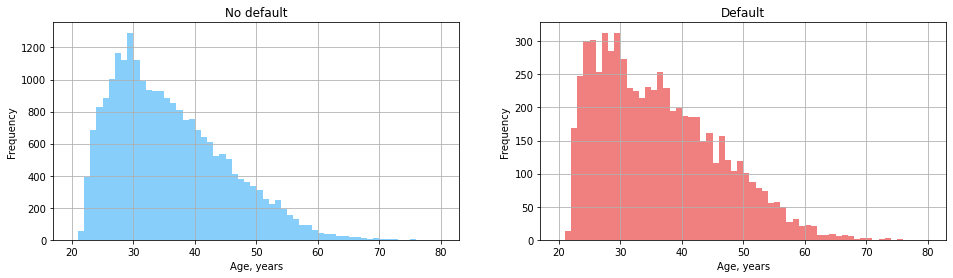

In [33]:
pylab.figure(figsize(16, 4))
pylab.subplot(1,2,1)
repayment.AGE.hist(color='lightskyblue', bins = 60, range = (20, 80))
pylab.xlabel('Age, years')
pylab.ylabel('Frequency')
plt.title('No default');


pylab.subplot(1,2,2)
loan.AGE.hist(color='lightcoral', bins = 60, range = (20, 80))
pylab.xlabel('Age, years')
pylab.ylabel('Frequency')
plt.title('Default');



In [34]:
print(scipy.stats.shapiro(repayment.AGE))
print(scipy.stats.shapiro(loan.AGE))


ShapiroResult(statistic=0.9496142864227295, pvalue=0.0)
ShapiroResult(statistic=0.9501639008522034, pvalue=1.0733946236728099e-42)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [35]:

print(scipy.stats.normaltest(repayment.AGE))
print(scipy.stats.normaltest(loan.AGE))


NormaltestResult(statistic=1774.1491725831022, pvalue=0.0)
NormaltestResult(statistic=417.8892064354769, pvalue=1.805143779273549e-91)


Both Shapiro-Wilk test and D’Agostino test shows possible problems for CLT at least for loan.age variable. There is limitation 5000 for Shapiro Wilk test. So, the one option is data transformation, another to use non-parametric tests, permutation test being as good option (we know the age distribution). After that we will estimate the effect size using the 95% CI

### Permutation test
$H_0\colon$ average age are the same in both groups.

$H_1\colon$ average age are not the same in both groups.

In [36]:
def permutation_t_stat_2s(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_permutations):
    index = np.array(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_permutations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_null_dist_2s(sample1, sample2, max_permutations = None):
    pooled_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n2 = len(sample2)
    n = n1 + n2
    
    if max_permutations:
        indices = get_random_combinations(n1, n2, max_permutations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [permutation_t_stat_2s(pooled_sample[list(i[0])], pooled_sample[list(i[1])]) \
             for i in indices]
    return distr

def permutation_test_2s(sample1, sample2, max_permutations = None, alternative = 'two-sided', return_distr = False):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_2s(sample1, sample2)
    
    null_distr = permutation_null_dist_2s(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        p = sum([1. if abs(x) >= abs(t_stat) else 0. for x in null_distr]) / len(null_distr)
    elif alternative == 'less':
        p = sum([1. if x <= t_stat else 0. for x in null_distr]) / len(null_distr)
    else: # alternative == 'greater':
        p = sum([1. if x >= t_stat else 0. for x in null_distr]) / len(null_distr)
    
    if return_distr:
        return {'t': t_stat, 'p': p, 'null_distr': null_distr}
    else:
        return {'t': t_stat, 'p': p}

In [38]:
res = permutation_test_2s(repayment.AGE, loan.AGE, max_permutations = 1000, return_distr = True)
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = -0.308473, p = 0.015000


In [39]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [40]:
# effect size estimation

print('Median in age distirbution for default = 0 %f' % np.median(repayment.AGE))
print('Median in age distirbution for default = 1 %f' % np.median(loan.AGE))
age0 = data[data['default'] == 0].loc[:, ['AGE']]
age1 = data[data['default'] == 1].loc[:, ['AGE']]

age0_bs = list(map(np.median, get_bootstrap_samples(age0.values, 100)))
age1_bs = list(map(np.median, get_bootstrap_samples(age1.values, 100)))

print('Conf. interval for median of age distirbution for default = 0 [%f,%f]' % (stat_intervals(age0_bs, 0.05)[0], 
      stat_intervals(age0_bs, 0.05)[1]))
print('Conf. interval for median of age distirbution for default = 1 [%f,%f]' % (stat_intervals(age1_bs, 0.05)[0], 
     stat_intervals(age1_bs, 0.05)[1]))

delta_med = np.median(age0) - np.median(age1)
print('Difference in medians = %f' % delta_med)

Median in age distirbution for default = 0 34.000000
Median in age distirbution for default = 1 34.000000
Conf. interval for median of age distirbution for default = 0 [34.000000,34.000000]
Conf. interval for median of age distirbution for default = 1 [34.000000,35.000000]
Difference in medians = 0.000000


In [41]:

delta_med_list = list(map(lambda x,y: x-y, age0_bs, age1_bs))
print('95 percent  Conf. int. for median difference [%f, %f]' % (stat_intervals(delta_med_list, 0.05)[0], 
                                                          stat_intervals(delta_med_list, 0.05)[1]))

95 percent  Conf. int. for median difference [-1.000000, 0.000000]


As conclusion we can reject null hypothesis versus 2 side alternative one (permutation test t = -0.308473, p = 0.015000) at significance level < 0.05. In the same time the effect size is reduce one (Difference in medians = 0.000000, 95% CI for median difference is -1, 0). Finally there is no practical significant difference in average Age between groups